In [1]:
! swig -c++ -python swig/poisson_mg.i
! python swig/setup.py build_ext --inplace

running build_ext
building '_poisson_mg' extension
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c swig/poisson_mg_wrap.cxx -o build/temp.linux-x86_64-3.7/swig/poisson_mg_wrap.o -I./ -std=c++11 -O3
In file included from swig/poisson_mg_wrap.cxx:3147:
./poisson_mg.h: In instantiation of ‘void poisson_mg<T>::execute() [with T = double]’:
swig/poisson_mg_wrap.cxx:10203:19:   required from here
./poisson_mg.h:56:41: warning: comparison of integer expressions of different signedness: ‘int’ and ‘unsigned int’ [-Wsign-compare]
   56 |     while ( error > accuracy_ && steps_ < nmax ){
      |                                  ~~~~~~~^~~~~~
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -W

In [2]:
import sys
import os
sys.path.append( os.path.abspath("swig") )

In [3]:
from mpl_toolkits.mplot3d import Axes3D 
import poisson_mg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time

In [4]:
acc = 1e-6
L = 16
h = 1/(L+1)
rho = np.zeros( (L,L))
rho[L//2,L//2] = 10./h**2
pmg = poisson_mg.poisson_mg_double(rho, acc, L)

In [7]:
t1 = time.perf_counter()
pmg.execute()
t2 = time.perf_counter()
print("time elapsed = ", (t2-t1))

<IPython.core.display.Javascript object>


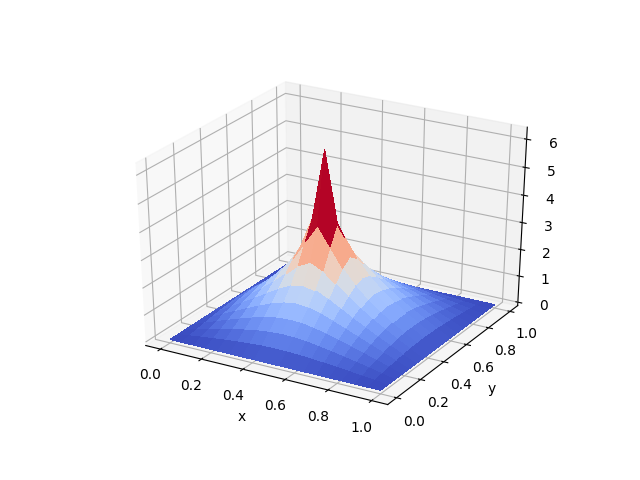

Text(0.5, 0, 'y')

In [10]:
%matplotlib notebook
a = pmg.get_psi()
# Define the axes
x = np.arange(0, h*(L+2), h)
y = np.arange(0, h*(L+2), h)
# Get the grid
X, Y = np.meshgrid(x, y)
# Set Z to the poisson V[i][j]
Z = np.array( a )

fig = plt.figure(1)
ax = fig.gca(projection='3d')
sur = ax.plot_surface( X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False )
plt.xlabel("x")
plt.ylabel("y")